# üìä Tendencias de Texto Web con Python

Este notebook es un experimento personal donde utilizo Python para:
- Obtener contenido textual de un art√≠culo web (scraping)
- Procesar y limpiar el texto
- Analizar las palabras m√°s frecuentes
- Visualizar los resultados con gr√°ficos y nube de palabras

Este an√°lisis puede ser √∫til para detectar temas recurrentes, crear res√∫menes autom√°ticos o entrenar modelos de lenguaje.

---

## Carga de librer√≠as

In [1]:
import requests
from bs4 import BeautifulSoup
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## Scraping del art√≠culo

In [2]:
def fetch_article(url):
    try:
        response = requests.get(url)
        if response.status_code != 200:
            print(f"Error: {response.status_code}")
            return ""
        soup = BeautifulSoup(response.text, "html.parser")
        paragraphs = soup.find_all("p")
        text = " ".join([p.get_text() for p in paragraphs])
        return text

    except Exception as e:
        print("Error al obtener el art√≠culo:", e)
        return ""

In [3]:
# URL de ejemplo
url = "http://bbc.com/mundo/articles/c04551g4nk9o"
text = fetch_article(url)

# Preview del texto
print(text[:500])


Fuente de la imagen, Getty Images Durante d√≠as, Donald Trump y su equipo de la Casa Blanca insistieron en su firme compromiso con su decisi√≥n de imponer aranceles "rec√≠procos" generalizados a docenas de pa√≠ses.  Incluso ridiculizaron una informaci√≥n surgida el martes que indicaba que el presidente estaba considerando una pausa de 90 d√≠as para los aranceles, noticia que desencaden√≥ un breve repunte en la bolsa. Pero ahora esa pausa de 90 d√≠as en el aumento de los aranceles, con algunas excepcione


## Limpieza y an√°lisis

In [4]:
def clean_text(raw_text):
    raw_text = raw_text.lower()
    raw_text = re.sub(r"[^a-z√°√©√≠√≥√∫√±\s]", "", raw_text)
    words = raw_text.split()
    stopwords = {
        "de",
        "la",
        "que",
        "el",
        "en",
        "los",
        "las",
        "por",
        "del",
        "se",
        "con",
        "una",
        "como",
        "m√°s",
        "para",
        "sus",
        "entre",
        "pero",
    }
    words = [word for word in words if word not in stopwords and len(word) > 3]
    return words


def count_words(words):
    return Counter(words).most_common(20)

In [5]:
words = clean_text(text)
word_frequency = count_words(words)
word_frequency

[('trump', 14),
 ('aranceles', 10),
 ('est√°', 9),
 ('d√≠as', 5),
 ('casa', 5),
 ('blanca', 5),
 ('presidente', 5),
 ('comercial', 4),
 ('semana', 4),
 ('fuente', 3),
 ('imagen', 3),
 ('getty', 3),
 ('images', 3),
 ('durante', 3),
 ('decisi√≥n', 3),
 ('pa√≠ses', 3),
 ('pausa', 3),
 ('china', 3),
 ('estadounidense', 3),
 ('prensa', 3)]

## Visualizaci√≥n

In [6]:
def graph_bars(word_counts):
    words, frecs = zip(*word_counts)
    plt.figure(figsize=(10, 5))
    plt.bar(words, frecs)
    plt.xticks(rotation=45)
    plt.title("Palabras m√°s frecuentes")
    plt.tight_layout()
    plt.show()


def generate_word_cloud(words):
    texto = " ".join(words)
    cloud = WordCloud(width=800, height=400, background_color="white").generate(texto)
    plt.figure(figsize=(10, 5))
    plt.imshow(cloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Nube de palabras")
    plt.show()

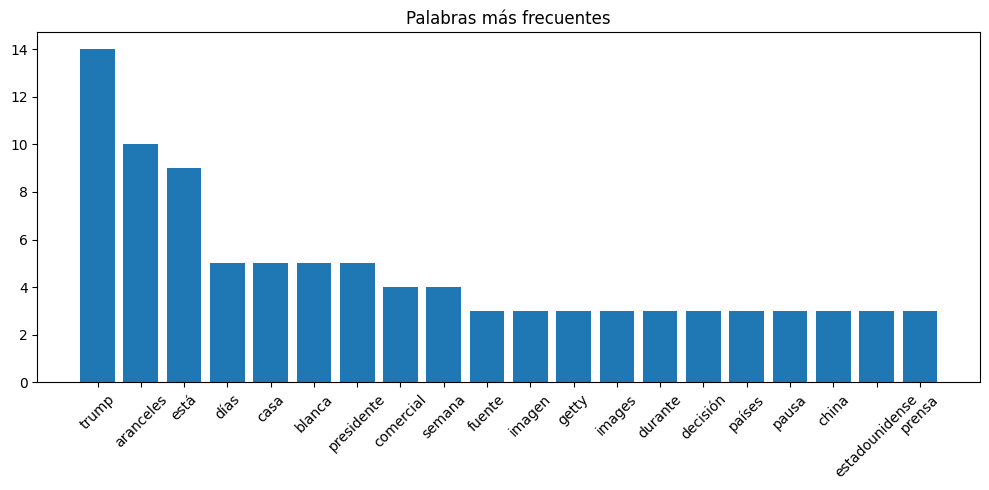

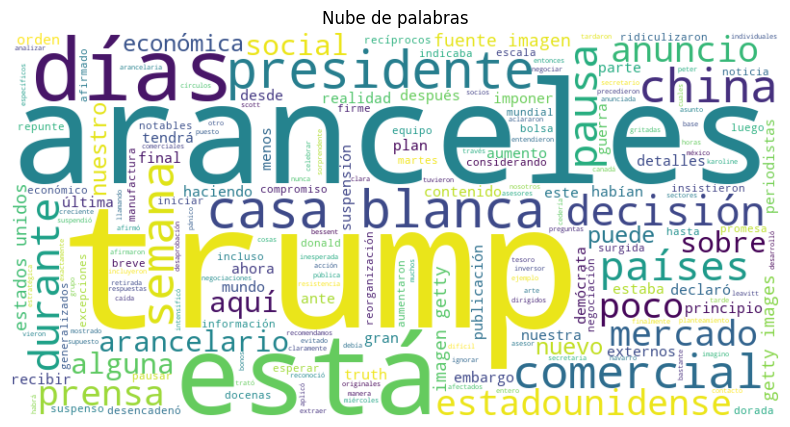

In [7]:
graph_bars(word_frequency)
generate_word_cloud(words)

## ‚úÖ Conclusiones

- Se detectaron las palabras clave m√°s frecuentes del art√≠culo analizado.
- Las visualizaciones muestran de forma intuitiva los temas principales.
- Este proceso puede repetirse con otros art√≠culos para encontrar tendencias.

### üöÄ Pr√≥ximos pasos:
- Guardar los resultados como archivo CSV o JSON
- Analizar varios art√≠culos y comparar palabras comunes
- Aplicar t√©cnicas de lematizaci√≥n y detecci√≥n de entidades (NER)
- Integrar este an√°lisis en una app web con FastAPI o Streamlit

---